In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [3]:


def fcc(X, centroids):
    
    K = centroids.shape[0]

    
    idx = np.zeros(X.shape[0], dtype=int)
    arr=[]

    
    for  r1 in X:
        arr_d = []
        for r2 in centroids:
            dist = 0
            for i in range(len(r2)):
                dist = dist + (r1[i]-r2[i])*(r1[i]-r2[i])
            d = dist*dist
            arr_d.append(d)
        min = arr_d[0]
        pos = 0
        for i in range(len(arr_d)):
            if(arr_d[i]<min):
                min = arr_d[i]
                pos = i
        arr.append(pos)
    replacement_values = np.array(arr)
    idx[idx == 0] = replacement_values
        
        
            
            
        
     
    
    return idx

In [5]:


def gen_centroids(X, idx, K):
    
    m, n = X.shape
    
    
    centroids = np.zeros((K, n))
    arr_tot=[]
    
    for k in range(K):
        points = X[idx == k] 
        centroids[k] = np.mean(points, axis = 0)
    
    
    return centroids

In [7]:


def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    
    for i in range(max_iters):
        
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        
        idx = fcc(X, centroids)
        
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        
        centroids = gen_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/99
K-Means iteration 1/99
K-Means iteration 2/99
K-Means iteration 3/99
K-Means iteration 4/99
K-Means iteration 5/99
K-Means iteration 6/99
K-Means iteration 7/99
K-Means iteration 8/99
K-Means iteration 9/99
K-Means iteration 10/99
K-Means iteration 11/99
K-Means iteration 12/99
K-Means iteration 13/99
K-Means iteration 14/99
K-Means iteration 15/99
K-Means iteration 16/99
K-Means iteration 17/99
K-Means iteration 18/99
K-Means iteration 19/99
K-Means iteration 20/99
K-Means iteration 21/99
K-Means iteration 22/99
K-Means iteration 23/99
K-Means iteration 24/99
K-Means iteration 25/99
K-Means iteration 26/99
K-Means iteration 27/99
K-Means iteration 28/99
K-Means iteration 29/99
K-Means iteration 30/99
K-Means iteration 31/99
K-Means iteration 32/99
K-Means iteration 33/99
K-Means iteration 34/99
K-Means iteration 35/99
K-Means iteration 36/99
K-Means iteration 37/99
K-Means iteration 38/99
K-Means iteration 39/99
K-Means iteration 40/99
K-Means iteration 41/99
K-

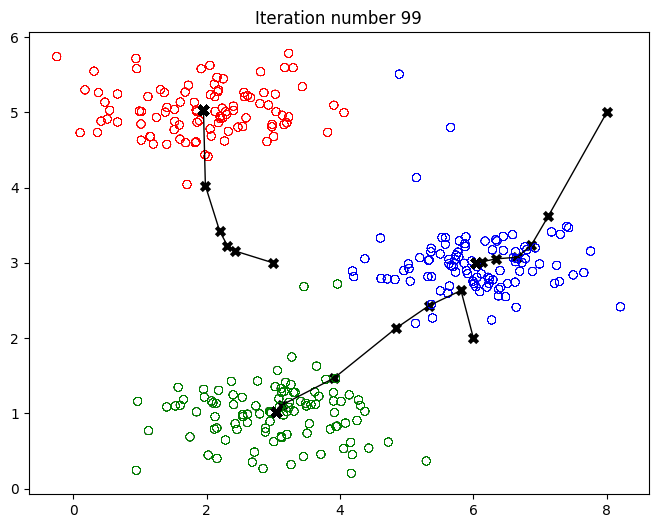

In [8]:

X = load_data()


initial_centroids = np.array([[3,3],[6,2],[8,5]])


max_iters = 100


centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [9]:

def kMeans_init_centroids(X, K):
    
    randidx = np.random.permutation(X.shape[0])
    
    
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/99
K-Means iteration 1/99
K-Means iteration 2/99
K-Means iteration 3/99
K-Means iteration 4/99
K-Means iteration 5/99
K-Means iteration 6/99
K-Means iteration 7/99
K-Means iteration 8/99
K-Means iteration 9/99
K-Means iteration 10/99
K-Means iteration 11/99
K-Means iteration 12/99
K-Means iteration 13/99
K-Means iteration 14/99
K-Means iteration 15/99
K-Means iteration 16/99
K-Means iteration 17/99
K-Means iteration 18/99
K-Means iteration 19/99
K-Means iteration 20/99
K-Means iteration 21/99
K-Means iteration 22/99
K-Means iteration 23/99
K-Means iteration 24/99
K-Means iteration 25/99
K-Means iteration 26/99
K-Means iteration 27/99
K-Means iteration 28/99
K-Means iteration 29/99
K-Means iteration 30/99
K-Means iteration 31/99
K-Means iteration 32/99
K-Means iteration 33/99
K-Means iteration 34/99
K-Means iteration 35/99
K-Means iteration 36/99
K-Means iteration 37/99
K-Means iteration 38/99
K-Means iteration 39/99
K-Means iteration 40/99
K-Means iteration 41/99
K-

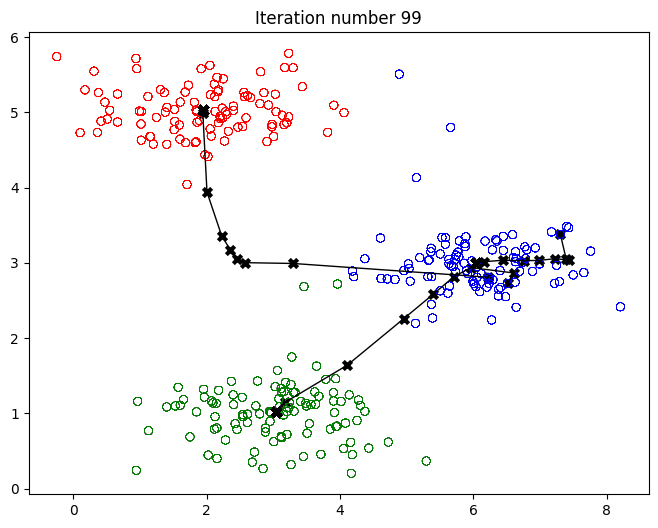

In [10]:

K = 3
max_iters = 100


initial_centroids = kMeans_init_centroids(X, K)

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [11]:

original_img = plt.imread('flower.png')

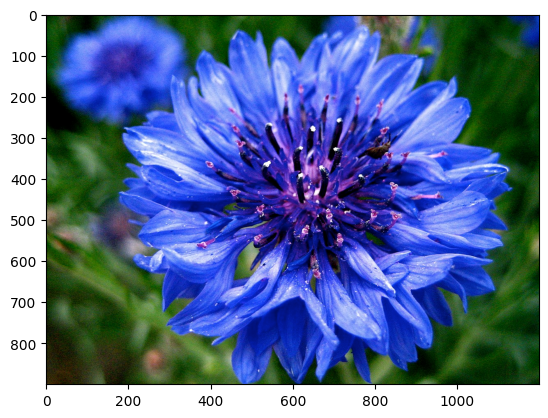

In [86]:

plt.imshow(original_img)

In [13]:
print("Shape is:", original_img.shape)

Shape is: (900, 1200, 3)


In [14]:


X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [15]:

K = 15
max_iters = 10


initial_centroids = kMeans_init_centroids(X_img, K)


centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [90]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (1080000,)
Closest centroid for the first five elements: [10 10  7 10  7]


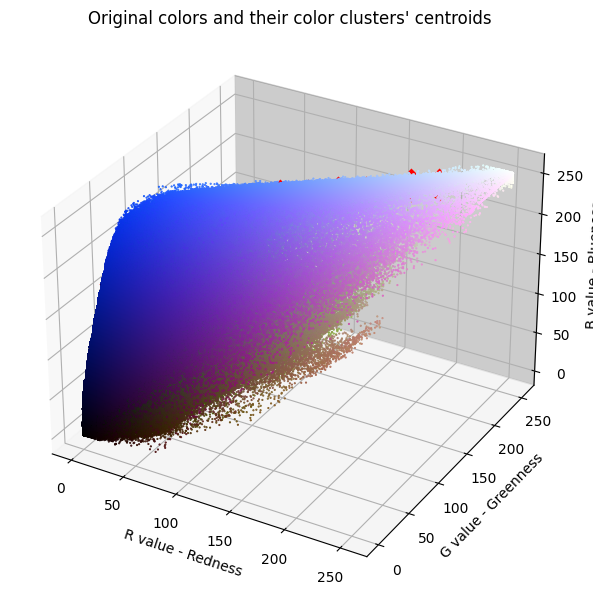

In [91]:

plot_kMeans_RGB(X_img, centroids, idx, K)

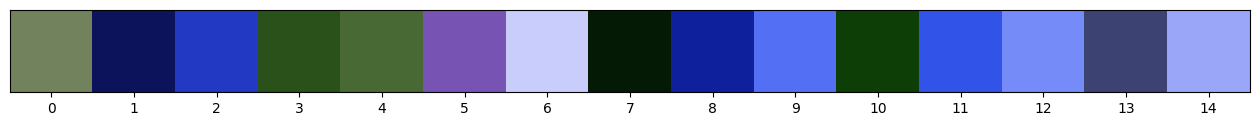

In [92]:

show_centroid_colors(centroids)

In [93]:

idx = fcc(X_img, centroids)


X_recovered = centroids[idx, :] 


X_recovered = np.reshape(X_recovered, original_img.shape) 

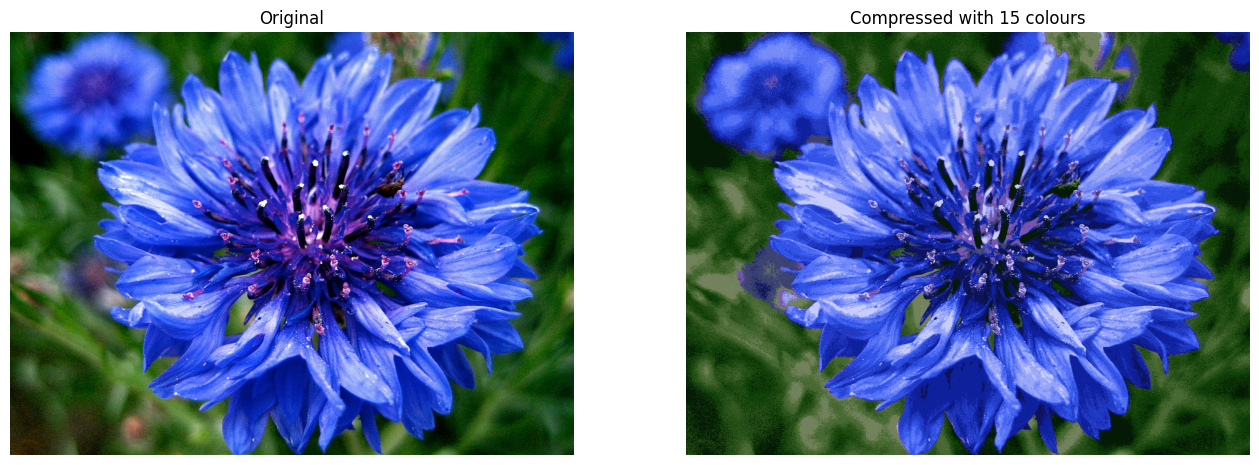

In [94]:

fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()



ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()